# BATTLE OF NEIGHBORHOODS

### Table of Contents 

#### 1. Download and Explore Dataset
#### 2. Explore Neighborhoods in New York City
#### 3. Analyze each Neighborhood
#### 4. Cluster Neighborhoods 
#### 5. Analyze Clusters

### Installing required Libraries

In [2]:
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import numpy as np # library to handle data in a vectorized manner

import json # library to handle JSON files

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests

from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

import matplotlib.cm as cm

# Matplotlib and associated plotting modules
import matplotlib.colors as colors 

import matplotlib.pyplot as plt

from sklearn.cluster import KMeans # import k-means from clustering stage

!pip install folium

import folium

print('Libraries Imported')

     |████████████████████████████████| 93 kB 3.2 MB/s eta 0:00:011
Libraries Imported


## 1. Download and Explore Datasets

In [3]:
!wget -q -O 'newyork_data.json' https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/labs/newyork_data.json
print('Data downloaded!') # Downloading the datasets

Data downloaded!


In [4]:
 # Load and Explore Data 
    
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

newyork_data

{'type': 'FeatureCollection',
 'totalFeatures': 306,
 'features': [{'type': 'Feature',
   'id': 'nyu_2451_34572.1',
   'geometry': {'type': 'Point',
    'coordinates': [-73.84720052054902, 40.89470517661]},
   'geometry_name': 'geom',
   'properties': {'name': 'Wakefield',
    'stacked': 1,
    'annoline1': 'Wakefield',
    'annoline2': None,
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.84720052054902,
     40.89470517661,
     -73.84720052054902,
     40.89470517661]}},
  {'type': 'Feature',
   'id': 'nyu_2451_34572.2',
   'geometry': {'type': 'Point',
    'coordinates': [-73.82993910812398, 40.87429419303012]},
   'geometry_name': 'geom',
   'properties': {'name': 'Co-op City',
    'stacked': 2,
    'annoline1': 'Co-op',
    'annoline2': 'City',
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.82993910812398,
     40.87429419303012,
     -73.82993910812398,
     40.87429419303012]}},
  {'type': 'Feature',
 

In [5]:
neighborhoods_data = newyork_data['features']
neighborhoods_data[0]

{'type': 'Feature',
 'id': 'nyu_2451_34572.1',
 'geometry': {'type': 'Point',
  'coordinates': [-73.84720052054902, 40.89470517661]},
 'geometry_name': 'geom',
 'properties': {'name': 'Wakefield',
  'stacked': 1,
  'annoline1': 'Wakefield',
  'annoline2': None,
  'annoline3': None,
  'annoangle': 0.0,
  'borough': 'Bronx',
  'bbox': [-73.84720052054902,
   40.89470517661,
   -73.84720052054902,
   40.89470517661]}}

In [6]:
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
df_ny = pd.DataFrame(columns=column_names)

In [7]:
df_ny

,Borough,Neighborhood,Latitude,Longitude


In [8]:
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    df_ny = df_ny.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

In [9]:
df_ny

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585
5,Bronx,Kingsbridge,40.881687,-73.902818
6,Manhattan,Marble Hill,40.876551,-73.910660
7,Bronx,Woodlawn,40.898273,-73.867315
8,Bronx,Norwood,40.877224,-73.879391
9,Bronx,Williamsbridge,40.881039,-73.857446


In [10]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(df_ny['Borough'].unique()),
        df_ny.shape[0]
    )
)

The dataframe has 5 boroughs and 306 neighborhoods.


In [11]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


#### Create a map of New York with neighborhoods superimposed on top.


In [12]:
# create map of New York using latitude and longitude values
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(df_ny['Latitude'], df_ny['Longitude'], df_ny['Borough'], df_ny['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='orange',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

In [13]:
## for illustraion let's simplify the above the map and segment and cluster only the neighborhoods in Manhattan 

manhattan_data =df_ny[df_ny['Borough'] == 'Manhattan'].reset_index(drop=True)
manhattan_data

,Borough,Neighborhood,Latitude,Longitude
0,Manhattan,Marble Hill,40.876551,-73.910660
1,Manhattan,Chinatown,40.715618,-73.994279
2,Manhattan,Washington Heights,40.851903,-73.936900
3,Manhattan,Inwood,40.867684,-73.921210
4,Manhattan,Hamilton Heights,40.823604,-73.949688
5,Manhattan,Manhattanville,40.816934,-73.957385
6,Manhattan,Central Harlem,40.815976,-73.943211
7,Manhattan,East Harlem,40.792249,-73.944182
8,Manhattan,Upper East Side,40.775639,-73.960508
9,Manhattan,Yorkville,40.775930,-73.947118


In [14]:
address = 'Manhattan, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Manhattan are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Manhattan are 40.7896239, -73.9598939.


In [15]:
# create map of Manhattan using latitude and longitude values
map_manhattan = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(manhattan_data['Latitude'], manhattan_data['Longitude'], manhattan_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_manhattan)  
    
map_manhattan

In [16]:
### Define FourSquare Credentials and Version 

CLIENT_ID = '' # your Foursquare ID
CLIENT_SECRET = '' # your Foursquare Secret
VERSION = '' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

#### Explore the First Neighborhood

In [17]:
manhattan_data.loc[0,'Neighborhood']

'Marble Hill'

In [18]:
neighborhood_latitude = manhattan_data.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = manhattan_data.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = manhattan_data.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Marble Hill are 40.87655077879964, -73.91065965862981.


#### Top 100 venues in Marble Hill within a radius of 500 meters

In [19]:
radius=500
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)

In [20]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5fe85f92a58dfc2a7c1778f9'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Marble Hill',
  'headerFullLocation': 'Marble Hill, New York',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 23,
  'suggestedBounds': {'ne': {'lat': 40.88105078329964,
    'lng': -73.90471933917806},
   'sw': {'lat': 40.87205077429964, 'lng': -73.91659997808156}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4b4429abf964a52037f225e3',
       'name': "Arturo's",
       'location': {'address': '5198 Broadway',
        'crossStreet': 'at 225th St.',
        'lat': 40.87441177110231,
        'lng': -73.91027100981574,
        'labeledLatLngs': [{'label'

In [21]:
# function that extracts the category of the venue

def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [22]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  app.launch_new_instance()


,name,categories,lat,lng
0,Arturo's,Pizza Place,40.874412,-73.910271
1,Bikram Yoga,Yoga Studio,40.876844,-73.906204
2,Tibbett Diner,Diner,40.880404,-73.908937
3,Dunkin',Donut Shop,40.877136,-73.906666
4,Starbucks,Coffee Shop,40.877531,-73.905582


In [23]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

23 venues were returned by Foursquare.


## 2. Explore Neighborhoods in Manhattan

In [24]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [25]:
manhattan_venues = getNearbyVenues(names=manhattan_data['Neighborhood'],
                                   latitudes=manhattan_data['Latitude'],
                                   longitudes=manhattan_data['Longitude']
                                  )

Marble Hill
Chinatown
Washington Heights
Inwood
Hamilton Heights
Manhattanville
Central Harlem
East Harlem
Upper East Side
Yorkville
Lenox Hill
Roosevelt Island
Upper West Side
Lincoln Square
Clinton
Midtown
Murray Hill
Chelsea
Greenwich Village
East Village
Lower East Side
Tribeca
Little Italy
Soho
West Village
Manhattan Valley
Morningside Heights
Gramercy
Battery Park City
Financial District
Carnegie Hill
Noho
Civic Center
Midtown South
Sutton Place
Turtle Bay
Tudor City
Stuyvesant Town
Flatiron
Hudson Yards


In [26]:
print(manhattan_venues.shape)
manhattan_venues.head()

(3230, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Marble Hill,40.876551,-73.91066,Arturo's,40.874412,-73.910271,Pizza Place
1,Marble Hill,40.876551,-73.91066,Bikram Yoga,40.876844,-73.906204,Yoga Studio
2,Marble Hill,40.876551,-73.91066,Tibbett Diner,40.880404,-73.908937,Diner
3,Marble Hill,40.876551,-73.91066,Dunkin',40.877136,-73.906666,Donut Shop
4,Marble Hill,40.876551,-73.91066,Starbucks,40.877531,-73.905582,Coffee Shop


In [27]:
print(manhattan_venues['Venue Category'].unique())
print('There are {} uniques categories.'.format(len(manhattan_venues['Venue Category'].unique())))

['Pizza Place' 'Yoga Studio' 'Diner' 'Donut Shop' 'Coffee Shop' 'Gym'
 'Seafood Restaurant' 'Tennis Stadium' 'Department Store' 'Discount Store'
 'Supplement Shop' 'Pharmacy' 'Ice Cream Shop' 'Sandwich Place'
 'Video Game Store' 'Steakhouse' 'Kids Store' 'Shopping Mall'
 'Deli / Bodega' 'Hotel' 'Cocktail Bar' 'Greek Restaurant' 'Bakery'
 'Chinese Restaurant' 'Spa' 'Bubble Tea Shop' 'Museum' 'Hotpot Restaurant'
 'Noodle House' 'Indie Movie Theater' 'New American Restaurant' 'Tea Room'
 'American Restaurant' 'Dessert Shop' 'Roof Deck' 'Spanish Restaurant'
 'Bike Shop' 'Record Shop' 'Salon / Barbershop' 'Furniture / Home Store'
 'Garden Center' 'Vietnamese Restaurant' 'Historic Site' 'Thai Restaurant'
 'Asian Restaurant' 'Boutique' 'Music Venue' 'Karaoke Bar'
 'Organic Grocery' 'Cosmetics Shop' 'Malay Restaurant' 'Optical Shop'
 'Shanghai Restaurant' 'Supermarket' 'Mexican Restaurant' 'Snack Place'
 'Paper / Office Supplies Store' 'Japanese Restaurant'
 'Taiwanese Restaurant' 'Ramen Resta

In [28]:
itl_res=manhattan_venues[manhattan_venues['Venue Category']=='Italian Restaurant'].reset_index(drop=True) # filtering italian restaurants among various types of restaurants

In [29]:
itl_res

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Washington Heights,40.851903,-73.936900,Saggio Restaurant,40.851423,-73.939761,Italian Restaurant
1,Washington Heights,40.851903,-73.936900,Pollo El Provocon,40.851715,-73.932571,Italian Restaurant
2,Hamilton Heights,40.823604,-73.949688,Fumo,40.821412,-73.950499,Italian Restaurant
3,Manhattanville,40.816934,-73.957385,Pisticci Ristorante,40.814015,-73.960266,Italian Restaurant
4,Manhattanville,40.816934,-73.957385,Bettolona,40.814084,-73.959574,Italian Restaurant
5,Upper East Side,40.775639,-73.960508,Sant Ambroeus,40.775328,-73.962819,Italian Restaurant
6,Upper East Side,40.775639,-73.960508,Sistina,40.777597,-73.961685,Italian Restaurant
7,Upper East Side,40.775639,-73.960508,Antonucci,40.775711,-73.956607,Italian Restaurant
8,Upper East Side,40.775639,-73.960508,Tiramisu,40.774946,-73.956932,Italian Restaurant
9,Upper East Side,40.775639,-73.960508,Caffe Buon Gusto - Manhattan,40.772498,-73.956994,Italian Restaurant


## 3. Analyze Each Neighborhood 

In [30]:
## All Restaurants within Manhattan
res_manhattan=manhattan_venues[manhattan_venues['Venue Category'].str.endswith('Restaurant')].reset_index(drop=True)
res_manhattan

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Marble Hill,40.876551,-73.910660,Land & Sea Restaurant,40.877885,-73.905873,Seafood Restaurant
1,Chinatown,40.715618,-73.994279,Kiki's,40.714476,-73.992036,Greek Restaurant
2,Chinatown,40.715618,-73.994279,Spicy Village,40.717010,-73.993530,Chinese Restaurant
3,Chinatown,40.715618,-73.994279,Wah Fung Number 1 Fast Food 華豐快餐店,40.717278,-73.994177,Chinese Restaurant
4,Chinatown,40.715618,-73.994279,Da Yu Hot Pot 大渝火锅,40.716735,-73.995752,Hotpot Restaurant
5,Chinatown,40.715618,-73.994279,Xi'an Famous Foods,40.715232,-73.997263,Chinese Restaurant
6,Chinatown,40.715618,-73.994279,Forgtmenot,40.714459,-73.991546,New American Restaurant
7,Chinatown,40.715618,-73.994279,Dimes,40.714830,-73.991719,American Restaurant
8,Chinatown,40.715618,-73.994279,Cervo's,40.714763,-73.991455,Spanish Restaurant
9,Chinatown,40.715618,-73.994279,Bêp Gà,40.717226,-73.993826,Vietnamese Restaurant


In [31]:
res_manhattan.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Battery Park City,5,5,5,5,5,5
Carnegie Hill,18,18,18,18,18,18
Central Harlem,14,14,14,14,14,14
Chelsea,19,19,19,19,19,19
Chinatown,40,40,40,40,40,40
Civic Center,24,24,24,24,24,24
Clinton,27,27,27,27,27,27
East Harlem,15,15,15,15,15,15
East Village,35,35,35,35,35,35


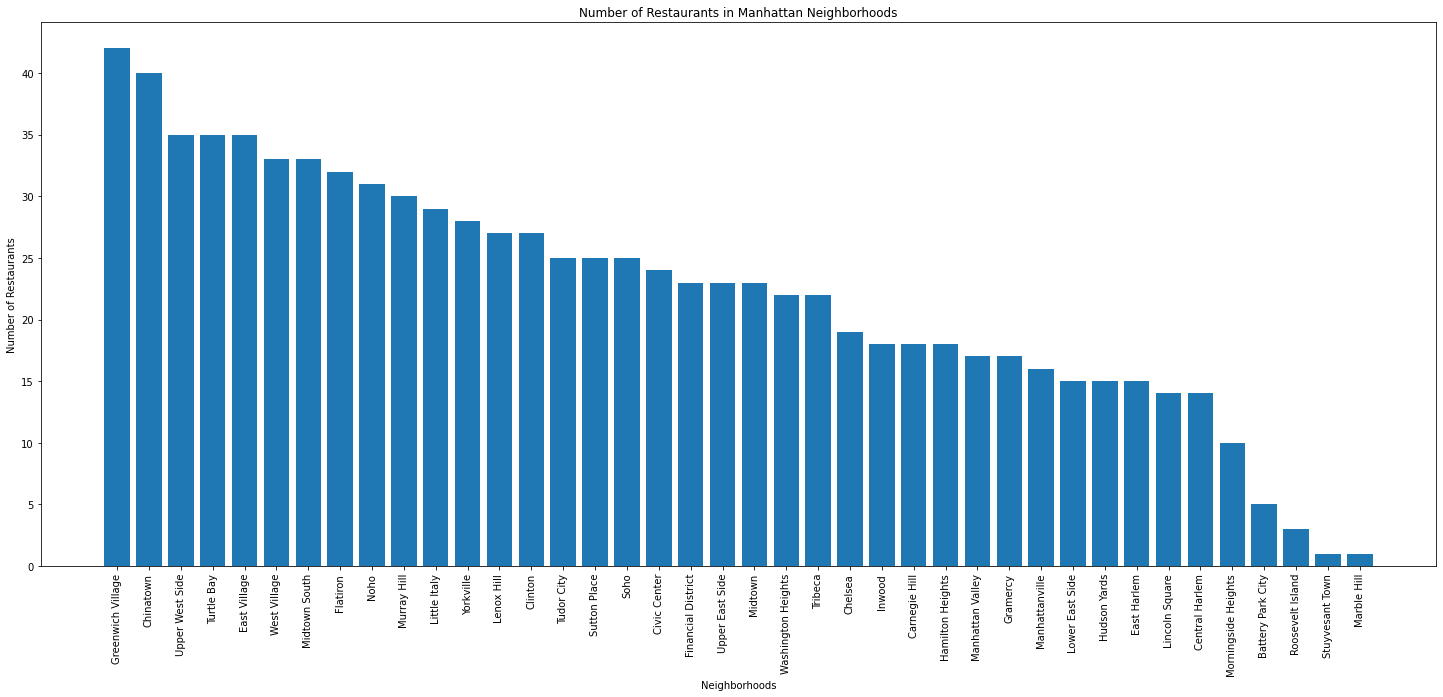

In [32]:
import matplotlib.pyplot as plt
res_manhattan1=res_manhattan.groupby('Neighborhood').count()
res_manhattan1.sort_values('Venue',ascending=False,inplace=True)
res_manhattan1.head()
bar_graph_data=pd.DataFrame(res_manhattan1['Venue']).reset_index()
x=bar_graph_data.iloc[:,0]
y=bar_graph_data.iloc[:,1]

plt.figure(figsize=(25,10))
plt.bar(x, y)

#plot labels and titles
plt.xlabel('Neighborhoods')
plt.xticks(rotation=90)
plt.ylabel('Number of Restaurants')
plt.title('Number of Restaurants in Manhattan Neighborhoods')
plt.show()


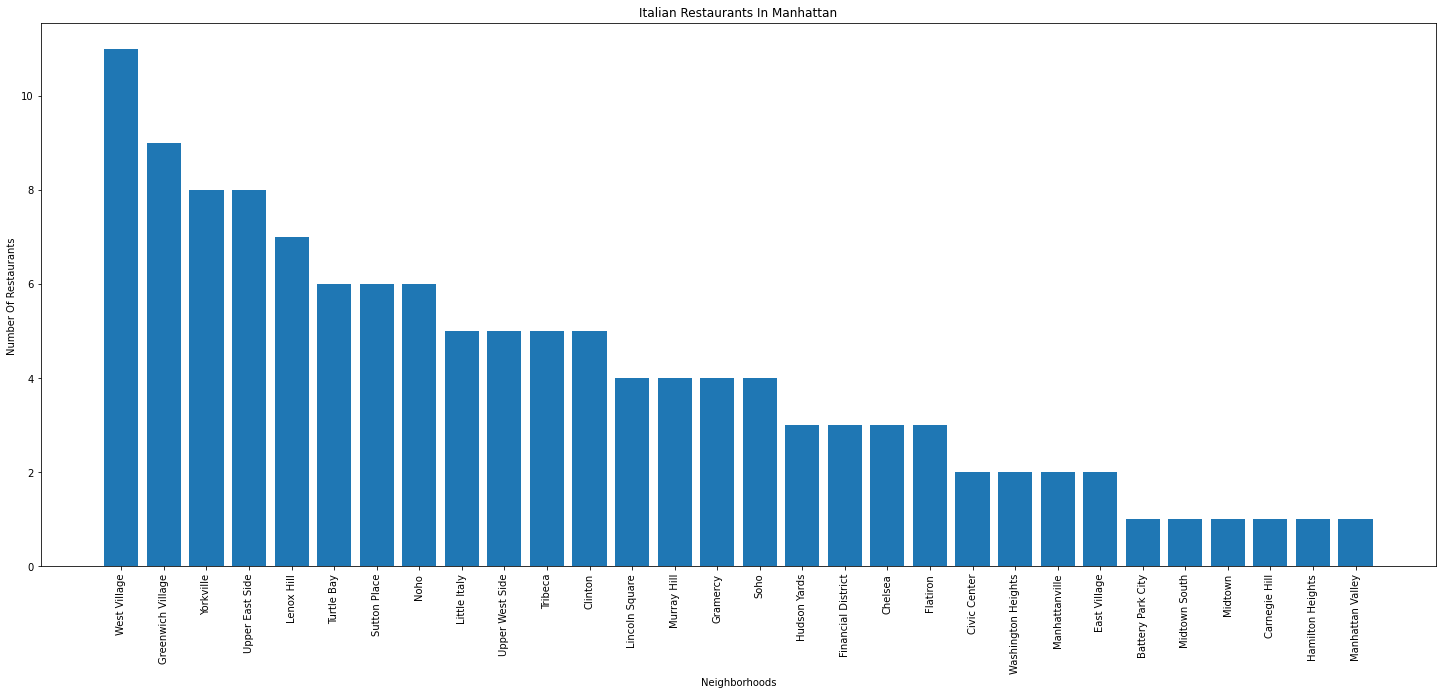

In [33]:
itl_res1=itl_res.groupby('Neighborhood').count()
itl_res1.sort_values('Venue',ascending=False,inplace=True)
grph_data=pd.DataFrame(itl_res1['Venue']).reset_index()
x=grph_data.iloc[:,0]
y=grph_data.iloc[:,1]
plt.figure(figsize=(25,10))
plt.bar(x,y)

#plot labels and Titles
plt.xlabel('Neighborhoods')
plt.xticks(rotation=90)
plt.ylabel('Number Of Restaurants ')
plt.title('Italian Restaurants In Manhattan')
plt.show()

In [34]:
# one hot encoding
res_onehot = pd.get_dummies(res_manhattan[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
res_onehot['Neighborhood'] = res_manhattan['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [res_onehot.columns[-1]] + list(res_onehot.columns[:-1])
res_onehot = res_onehot[fixed_columns]

res_onehot.head()

,Neighborhood,Afghan Restaurant,African Restaurant,American Restaurant,Argentinian Restaurant,Asian Restaurant,Australian Restaurant,Austrian Restaurant,Brazilian Restaurant,Cajun / Creole Restaurant,Cantonese Restaurant,Caribbean Restaurant,Chinese Restaurant,Cuban Restaurant,Czech Restaurant,Dim Sum Restaurant,Dumpling Restaurant,Eastern European Restaurant,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,French Restaurant,German Restaurant,Gluten-free Restaurant,Greek Restaurant,Hawaiian Restaurant,Hotpot Restaurant,Indian Restaurant,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jewish Restaurant,Kebab Restaurant,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Lebanese Restaurant,Malay Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Molecular Gastronomy Restaurant,Moroccan Restaurant,New American Restaurant,North Indian Restaurant,Paella Restaurant,Persian Restaurant,Peruvian Restaurant,Ramen Restaurant,Restaurant,Russian Restaurant,Scandinavian Restaurant,Seafood Restaurant,Shanghai Restaurant,Soba Restaurant,South American Restaurant,South Indian Restaurant,Southern / Soul Food Restaurant,Spanish Restaurant,Sushi Restaurant,Swiss Restaurant,Szechuan Restaurant,Taiwanese Restaurant,Tapas Restaurant,Thai Restaurant,Turkish Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Vietnamese Restaurant
0,Marble Hill,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Chinatown,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Chinatown,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Chinatown,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Chinatown,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [35]:
res_onehot.shape

(885, 75)

In [36]:
res_grouped = res_onehot.groupby('Neighborhood').mean().reset_index()
res_grouped

,Neighborhood,Afghan Restaurant,African Restaurant,American Restaurant,Argentinian Restaurant,Asian Restaurant,Australian Restaurant,Austrian Restaurant,Brazilian Restaurant,Cajun / Creole Restaurant,Cantonese Restaurant,Caribbean Restaurant,Chinese Restaurant,Cuban Restaurant,Czech Restaurant,Dim Sum Restaurant,Dumpling Restaurant,Eastern European Restaurant,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,French Restaurant,German Restaurant,Gluten-free Restaurant,Greek Restaurant,Hawaiian Restaurant,Hotpot Restaurant,Indian Restaurant,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jewish Restaurant,Kebab Restaurant,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Lebanese Restaurant,Malay Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Molecular Gastronomy Restaurant,Moroccan Restaurant,New American Restaurant,North Indian Restaurant,Paella Restaurant,Persian Restaurant,Peruvian Restaurant,Ramen Restaurant,Restaurant,Russian Restaurant,Scandinavian Restaurant,Seafood Restaurant,Shanghai Restaurant,Soba Restaurant,South American Restaurant,South Indian Restaurant,Southern / Soul Food Restaurant,Spanish Restaurant,Sushi Restaurant,Swiss Restaurant,Szechuan Restaurant,Taiwanese Restaurant,Tapas Restaurant,Thai Restaurant,Turkish Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Vietnamese Restaurant
0,Battery Park City,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.200000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.200000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Carnegie Hill,0.000000,0.000000,0.055556,0.055556,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.055556,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.00000,0.000000,0.000000,0.055556,0.000000,0.111111,0.000000,0.00000,0.000000,0.000000,0.000000,0.111111,0.000000,0.055556,0.000000,0.111111,0.000000,0.000000,0.000000,0.055556,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.055556,0.055556,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.055556,0.000000,0.000000,0.000000,0.000000,0.055556,0.000000,0.000000,0.055556,0.000000,0.055556
2,Central Harlem,0.000000,0.142857,0.142857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.071429,0.142857,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.00000,0.071429,0.000000,0.000000,0.000000,0.142857,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,0.071429,0.000000,0.000000,0.000000,0.000000,0.000000,0.071429,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,Chelsea,0.000000,0.000000,0.157895,0.000000,0.052632,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.052632,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.157895,0.000000,0.00000,0.000000,0.000000,0.000000,0.052632,0.052632,0.157895,0.000000,0.052632,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.052632,0.000000,0.0

In [37]:
res_grouped.shape

(40, 75)

In [38]:
num_top_venues = 5

for hood in res_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = res_grouped[res_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Battery Park City----
                      venue  freq
0  Mediterranean Restaurant   0.2
1        Mexican Restaurant   0.2
2       Japanese Restaurant   0.2
3        Italian Restaurant   0.2
4        Chinese Restaurant   0.2


----Carnegie Hill----
                  venue  freq
0   Japanese Restaurant  0.11
1     Indian Restaurant  0.11
2     French Restaurant  0.11
3     Kosher Restaurant  0.06
4  Fast Food Restaurant  0.06


----Central Harlem----
                 venue  freq
0    French Restaurant  0.14
1  American Restaurant  0.14
2   Seafood Restaurant  0.14
3   African Restaurant  0.14
4   Chinese Restaurant  0.14


----Chelsea----
                 venue  freq
0  American Restaurant  0.16
1    French Restaurant  0.16
2   Italian Restaurant  0.16
3   Seafood Restaurant  0.11
4   Chinese Restaurant  0.05


----Chinatown----
                   venue  freq
0     Chinese Restaurant  0.20
1    American Restaurant  0.10
2  Vietnamese Restaurant  0.08
3       Malay Restaurant  0.05


In [39]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [40]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = res_grouped['Neighborhood']

for ind in np.arange(res_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(res_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()
 

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Battery Park City,Chinese Restaurant,Japanese Restaurant,Italian Restaurant,Mediterranean Restaurant,Mexican Restaurant,Vietnamese Restaurant,Fast Food Restaurant,Filipino Restaurant,French Restaurant,German Restaurant
1,Carnegie Hill,Indian Restaurant,French Restaurant,Japanese Restaurant,Vietnamese Restaurant,Sushi Restaurant,Italian Restaurant,Kosher Restaurant,Fast Food Restaurant,Ramen Restaurant,Chinese Restaurant
2,Central Harlem,Chinese Restaurant,African Restaurant,American Restaurant,French Restaurant,Seafood Restaurant,Tapas Restaurant,Ethiopian Restaurant,Southern / Soul Food Restaurant,Caribbean Restaurant,Vietnamese Restaurant
3,Chelsea,French Restaurant,American Restaurant,Italian Restaurant,Seafood Restaurant,Japanese Restaurant,Paella Restaurant,Asian Restaurant,Israeli Restaurant,Indian Restaurant,New American Restaurant
4,Chinatown,Chinese Restaurant,American Restaurant,Vietnamese Restaurant,Asian Restaurant,Dim Sum Restaurant,Dumpling Restaurant,Greek Restaurant,Hotpot Restaurant,Malay Restaurant,Mexican Restaurant


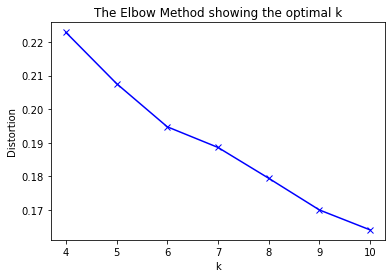

In [42]:
from sklearn import metrics
from scipy.spatial.distance import cdist

res_grouped_clustering = res_grouped.drop('Neighborhood', 1)
distortions = []
K = range(4,11)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(res_grouped_clustering)
    kmeanModel.fit(res_grouped_clustering)
    distortions.append(sum(np.min(cdist(res_grouped_clustering, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / res_grouped_clustering.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

 

In [43]:
kclusters = 6

res_grouped_clustering = res_grouped.drop('Neighborhood', 1)

kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(res_grouped_clustering)

kmeans.labels_[0:10] 

array([0, 0, 0, 0, 3, 0, 0, 3, 3, 0], dtype=int32)

In [44]:
#Create a new dataframe that includes the cluster
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

manhattan_merged = manhattan_data

# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
manhattan_merged = manhattan_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

manhattan_merged

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Manhattan,Marble Hill,40.876551,-73.910660,1,Seafood Restaurant,Vietnamese Restaurant,Gluten-free Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,French Restaurant,German Restaurant,Greek Restaurant
1,Manhattan,Chinatown,40.715618,-73.994279,3,Chinese Restaurant,American Restaurant,Vietnamese Restaurant,Asian Restaurant,Dim Sum Restaurant,Dumpling Restaurant,Greek Restaurant,Hotpot Restaurant,Malay Restaurant,Mexican Restaurant
2,Manhattan,Washington Heights,40.851903,-73.936900,3,Chinese Restaurant,Italian Restaurant,New American Restaurant,Tapas Restaurant,Latin American Restaurant,Spanish Restaurant,Sushi Restaurant,Caribbean Restaurant,Restaurant,Ramen Restaurant
3,Manhattan,Inwood,40.867684,-73.921210,3,Mexican Restaurant,Restaurant,Spanish Restaurant,Caribbean Restaurant,Chinese Restaurant,Empanada Restaurant,American Restaurant,Latin American Restaurant,Fast Food Restaurant,Seafood Restaurant
4,Manhattan,Hamilton Heights,40.823604,-73.949688,3,Mexican Restaurant,Latin American Restaurant,Indian Restaurant,Sushi Restaurant,Caribbean Restaurant,Chinese Restaurant,Italian Restaurant,Fast Food Restaurant,Japanese Restaurant,Mediterranean Restaurant
5,Manhattan,Manhattanville,40.816934,-73.957385,0,Italian Restaurant,Mexican Restaurant,Seafood Restaurant,Dumpling Restaurant,Spanish Restaurant,Indian Restaurant,Falafel Restaurant,Ramen Restaurant,Cuban Restaurant,Chinese Restaurant
6,Manhattan,Central Harlem,40.815976,-73.943211,0,Chinese Restaurant,African Restaurant,American Restaurant,French Restaurant,Seafood Restaurant,Tapas Restaurant,Ethiopian Restaurant,Southern / Soul Food Restaurant,Caribbean Restaurant,Vietnamese Restaurant
7,Manhattan,East Harlem,40.792249,-73.944182,3,Mexican Restaurant,Thai Restaurant,Latin American Restaurant,Spanish Restaurant,New American Restaurant,Cuban Restaurant,French Restaurant,Restaurant,Hawaiian Restaurant,Greek Restaurant
8,Manhattan,Upper East Side,40.775639,-73.960508,0,Italian Restaurant,French Restaurant,American Restaurant,Sushi Restaurant,Japanese Restaurant,Vegetarian / Vegan Restaurant,Tapas Restaurant,Latin American Restaurant,Seafood Restaurant,Mediterranean Restaurant
9,Manhattan,Yorkville,40.775930,-73.947118,0,Italian Restaurant,Sushi Restaurant,Japanese Restaurant,Mexican Restaurant,Vietnamese Restaurant,Thai Restaurant,Latin American Restaurant,Peruvian Restaurant,French Restaurant,German Restaurant


In [45]:
manhattan_merged=manhattan_merged.dropna()
manhattan_merged['Cluster Labels'].astype(int)
manhattan_merged


manhattan_merged = manhattan_merged.astype({"Cluster Labels": int})
manhattan_merged.dtypes
manhattan_merged

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Manhattan,Marble Hill,40.876551,-73.910660,1,Seafood Restaurant,Vietnamese Restaurant,Gluten-free Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,French Restaurant,German Restaurant,Greek Restaurant
1,Manhattan,Chinatown,40.715618,-73.994279,3,Chinese Restaurant,American Restaurant,Vietnamese Restaurant,Asian Restaurant,Dim Sum Restaurant,Dumpling Restaurant,Greek Restaurant,Hotpot Restaurant,Malay Restaurant,Mexican Restaurant
2,Manhattan,Washington Heights,40.851903,-73.936900,3,Chinese Restaurant,Italian Restaurant,New American Restaurant,Tapas Restaurant,Latin American Restaurant,Spanish Restaurant,Sushi Restaurant,Caribbean Restaurant,Restaurant,Ramen Restaurant
3,Manhattan,Inwood,40.867684,-73.921210,3,Mexican Restaurant,Restaurant,Spanish Restaurant,Caribbean Restaurant,Chinese Restaurant,Empanada Restaurant,American Restaurant,Latin American Restaurant,Fast Food Restaurant,Seafood Restaurant
4,Manhattan,Hamilton Heights,40.823604,-73.949688,3,Mexican Restaurant,Latin American Restaurant,Indian Restaurant,Sushi Restaurant,Caribbean Restaurant,Chinese Restaurant,Italian Restaurant,Fast Food Restaurant,Japanese Restaurant,Mediterranean Restaurant
5,Manhattan,Manhattanville,40.816934,-73.957385,0,Italian Restaurant,Mexican Restaurant,Seafood Restaurant,Dumpling Restaurant,Spanish Restaurant,Indian Restaurant,Falafel Restaurant,Ramen Restaurant,Cuban Restaurant,Chinese Restaurant
6,Manhattan,Central Harlem,40.815976,-73.943211,0,Chinese Restaurant,African Restaurant,American Restaurant,French Restaurant,Seafood Restaurant,Tapas Restaurant,Ethiopian Restaurant,Southern / Soul Food Restaurant,Caribbean Restaurant,Vietnamese Restaurant
7,Manhattan,East Harlem,40.792249,-73.944182,3,Mexican Restaurant,Thai Restaurant,Latin American Restaurant,Spanish Restaurant,New American Restaurant,Cuban Restaurant,French Restaurant,Restaurant,Hawaiian Restaurant,Greek Restaurant
8,Manhattan,Upper East Side,40.775639,-73.960508,0,Italian Restaurant,French Restaurant,American Restaurant,Sushi Restaurant,Japanese Restaurant,Vegetarian / Vegan Restaurant,Tapas Restaurant,Latin American Restaurant,Seafood Restaurant,Mediterranean Restaurant
9,Manhattan,Yorkville,40.775930,-73.947118,0,Italian Restaurant,Sushi Restaurant,Japanese Restaurant,Mexican Restaurant,Vietnamese Restaurant,Thai Restaurant,Latin American Restaurant,Peruvian Restaurant,French Restaurant,German Restaurant


In [46]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(manhattan_merged['Latitude'], manhattan_merged['Longitude'], manhattan_merged['Neighborhood'], manhattan_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=10,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Examine Clusters

In [47]:
## Cluster 1 

manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 0, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,Manhattanville,Italian Restaurant,Mexican Restaurant,Seafood Restaurant,Dumpling Restaurant,Spanish Restaurant,Indian Restaurant,Falafel Restaurant,Ramen Restaurant,Cuban Restaurant,Chinese Restaurant
6,Central Harlem,Chinese Restaurant,African Restaurant,American Restaurant,French Restaurant,Seafood Restaurant,Tapas Restaurant,Ethiopian Restaurant,Southern / Soul Food Restaurant,Caribbean Restaurant,Vietnamese Restaurant
8,Upper East Side,Italian Restaurant,French Restaurant,American Restaurant,Sushi Restaurant,Japanese Restaurant,Vegetarian / Vegan Restaurant,Tapas Restaurant,Latin American Restaurant,Seafood Restaurant,Mediterranean Restaurant
9,Yorkville,Italian Restaurant,Sushi Restaurant,Japanese Restaurant,Mexican Restaurant,Vietnamese Restaurant,Thai Restaurant,Latin American Restaurant,Peruvian Restaurant,French Restaurant,German Restaurant
10,Lenox Hill,Italian Restaurant,Sushi Restaurant,Thai Restaurant,Afghan Restaurant,Chinese Restaurant,Greek Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Eastern European Restaurant,Czech Restaurant
12,Upper West Side,Italian Restaurant,Indian Restaurant,French Restaurant,Seafood Restaurant,Vegetarian / Vegan Restaurant,Thai Restaurant,American Restaurant,Mediterranean Restaurant,Mexican Restaurant,Israeli Restaurant
13,Lincoln Square,Italian Restaurant,French Restaurant,American Restaurant,Seafood Restaurant,Mediterranean Restaurant,Mexican Restaurant,Greek Restaurant,Chinese Restaurant,Vietnamese Restaurant,Gluten-free Restaurant
14,Clinton,Italian Restaurant,American Restaurant,New American Restaurant,Mediterranean Restaurant,French Restaurant,Restaurant,Korean Restaurant,Chinese Restaurant,Ethiopian Restaurant,Peruvian Restaurant
15,Midtown,Mediterranean Restaurant,Japanese Restaurant,Turkish Restaurant,French Restaurant,Indian Restaurant,Cuban Restaurant,Sushi Restaurant,Greek Restaurant,Fast Food Restaurant,Chinese Restaurant
16,Murray Hill,Italian Restaurant,Japanese Restaurant,American Restaurant,Jewish Restaurant,Restaurant,Cuban Restaurant,Chinese Restaurant,Hawaiian Restaurant,Greek Restaurant,Latin American Restaurant


In [48]:
## Cluster 2

manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 1, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Marble Hill,Seafood Restaurant,Vietnamese Restaurant,Gluten-free Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,French Restaurant,German Restaurant,Greek Restaurant


In [49]:
## Cluster 3

manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 2, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
37,Stuyvesant Town,German Restaurant,Vietnamese Restaurant,English Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,French Restaurant,Gluten-free Restaurant,Greek Restaurant,Hawaiian Restaurant


In [50]:
## Cluster 4

manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 3, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Chinatown,Chinese Restaurant,American Restaurant,Vietnamese Restaurant,Asian Restaurant,Dim Sum Restaurant,Dumpling Restaurant,Greek Restaurant,Hotpot Restaurant,Malay Restaurant,Mexican Restaurant
2,Washington Heights,Chinese Restaurant,Italian Restaurant,New American Restaurant,Tapas Restaurant,Latin American Restaurant,Spanish Restaurant,Sushi Restaurant,Caribbean Restaurant,Restaurant,Ramen Restaurant
3,Inwood,Mexican Restaurant,Restaurant,Spanish Restaurant,Caribbean Restaurant,Chinese Restaurant,Empanada Restaurant,American Restaurant,Latin American Restaurant,Fast Food Restaurant,Seafood Restaurant
4,Hamilton Heights,Mexican Restaurant,Latin American Restaurant,Indian Restaurant,Sushi Restaurant,Caribbean Restaurant,Chinese Restaurant,Italian Restaurant,Fast Food Restaurant,Japanese Restaurant,Mediterranean Restaurant
7,East Harlem,Mexican Restaurant,Thai Restaurant,Latin American Restaurant,Spanish Restaurant,New American Restaurant,Cuban Restaurant,French Restaurant,Restaurant,Hawaiian Restaurant,Greek Restaurant
19,East Village,Mexican Restaurant,Korean Restaurant,Vegetarian / Vegan Restaurant,Seafood Restaurant,American Restaurant,Chinese Restaurant,Italian Restaurant,Japanese Restaurant,Ramen Restaurant,Vietnamese Restaurant
20,Lower East Side,Chinese Restaurant,Japanese Restaurant,Ramen Restaurant,Caribbean Restaurant,Latin American Restaurant,Mediterranean Restaurant,French Restaurant,Filipino Restaurant,Vietnamese Restaurant,Argentinian Restaurant
25,Manhattan Valley,Thai Restaurant,Indian Restaurant,Mexican Restaurant,Vietnamese Restaurant,Peruvian Restaurant,Caribbean Restaurant,Ethiopian Restaurant,French Restaurant,Hawaiian Restaurant,Italian Restaurant
36,Tudor City,Mexican Restaurant,Vietnamese Restaurant,Sushi Restaurant,Thai Restaurant,Seafood Restaurant,Greek Restaurant,Spanish Restaurant,Restaurant,French Restaurant,Shanghai Restaurant


In [51]:
## Cluster 5

manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 4, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
33,Midtown South,Korean Restaurant,American Restaurant,Japanese Restaurant,Ramen Restaurant,Vegetarian / Vegan Restaurant,Italian Restaurant,Persian Restaurant,Fast Food Restaurant,German Restaurant,Ethiopian Restaurant


In [52]:
## Cluster 6

manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 5, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
11,Roosevelt Island,Greek Restaurant,Japanese Restaurant,Restaurant,Japanese Curry Restaurant,Italian Restaurant,Israeli Restaurant,Indian Restaurant,Hotpot Restaurant,Hawaiian Restaurant,English Restaurant


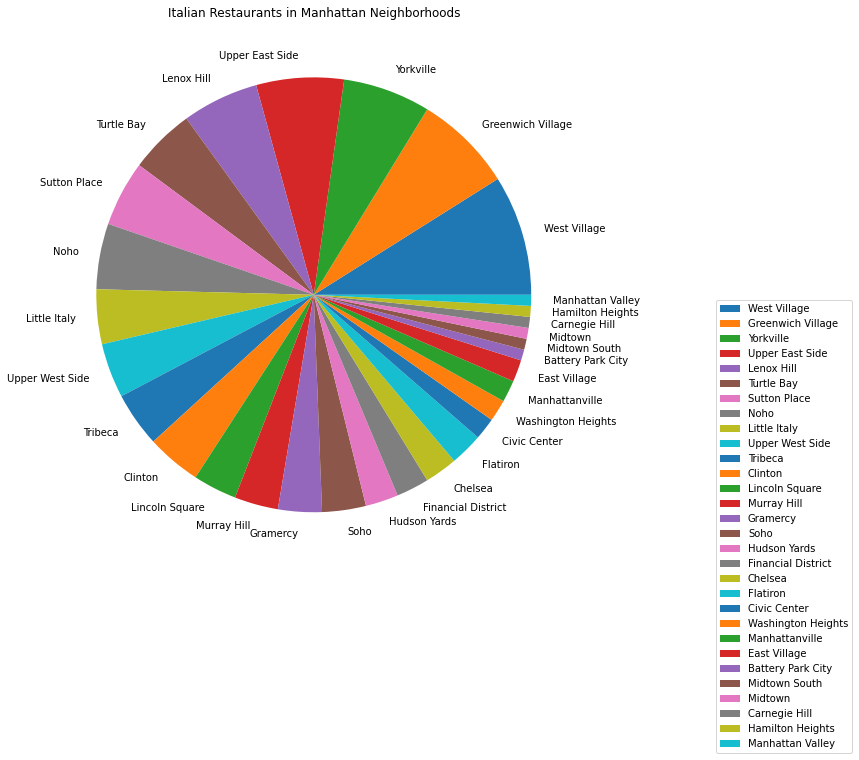

In [53]:
## Pie Chart

labels= grph_data['Neighborhood']
data=grph_data['Venue']
fig=plt.figure(figsize=(22,10))
plt.pie(data,labels=labels)
plt.title('Italian Restaurants in Manhattan Neighborhoods')
plt.legend(labels,bbox_to_anchor=(1.5,.5))
plt.show()

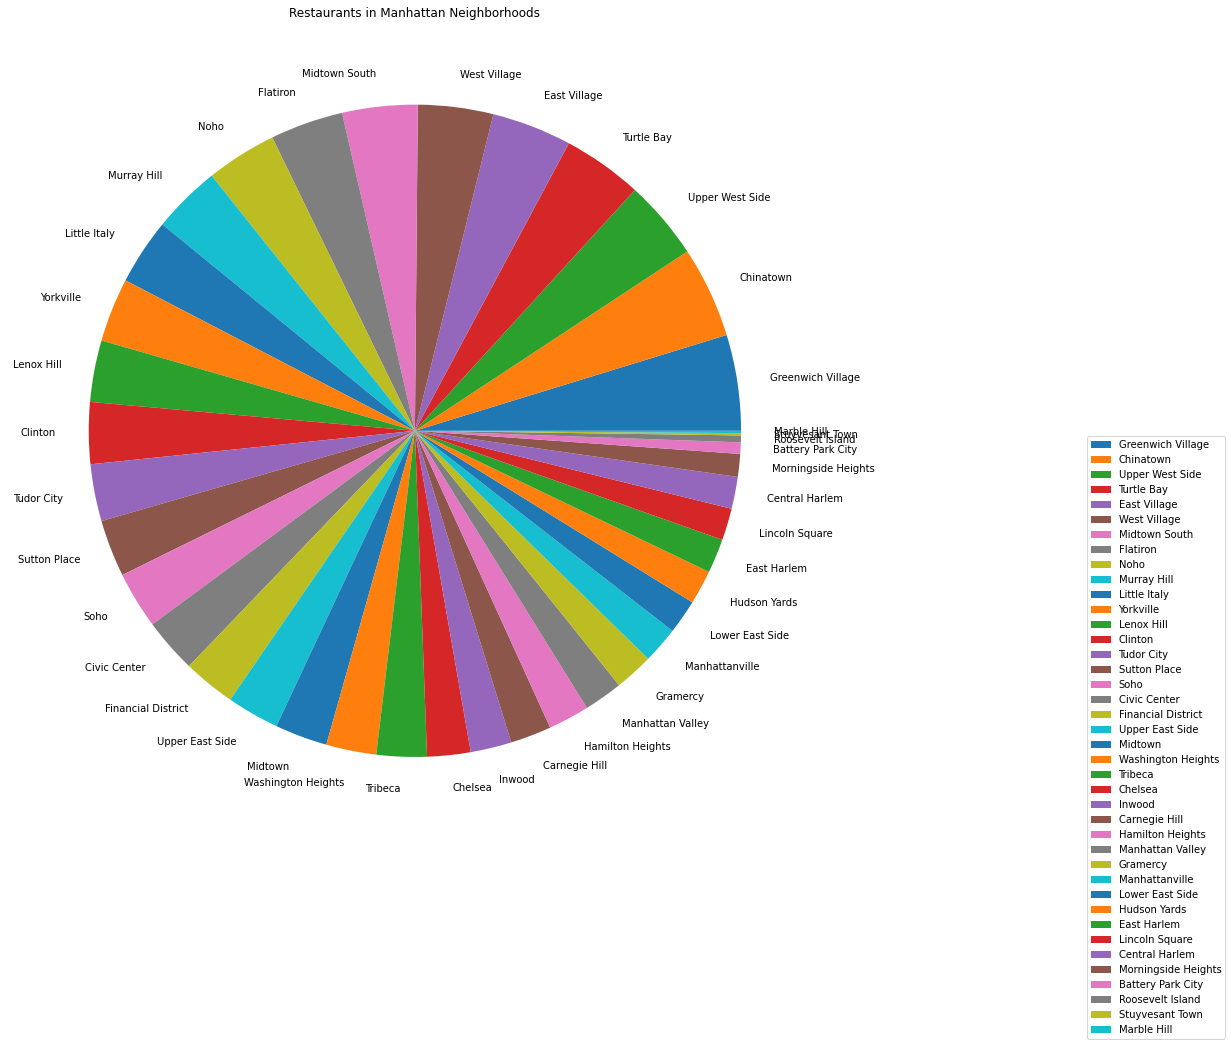

In [54]:
labels= bar_graph_data['Neighborhood']
data=bar_graph_data['Venue']
fig=plt.figure(figsize=(30,15))
plt.pie(data,labels=labels)
plt.title('Restaurants in Manhattan Neighborhoods')
plt.legend(labels,bbox_to_anchor=(1.5,.5))
plt.show()